# Ensemble Learning
---

## Voting

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=8)
voting = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print(accuracy_score(y_test, y_hat))

knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print(accuracy_score(y_test, y_hat))

voting.fit(X_train, y_train)
y_hat = voting.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9385964912280702
0.9385964912280702
0.9473684210526315


## Bagging

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9736842105263158


In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [10, 12, 14],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [4, 6, 8]
}

rfc = RandomForestClassifier()
gs = GridSearchCV(rfc, param_grid=params, cv=5)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 20}
0.964835164835165


In [11]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_leaf=4, min_samples_split=6)
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9649122807017544


<BarContainer object of 20 artists>

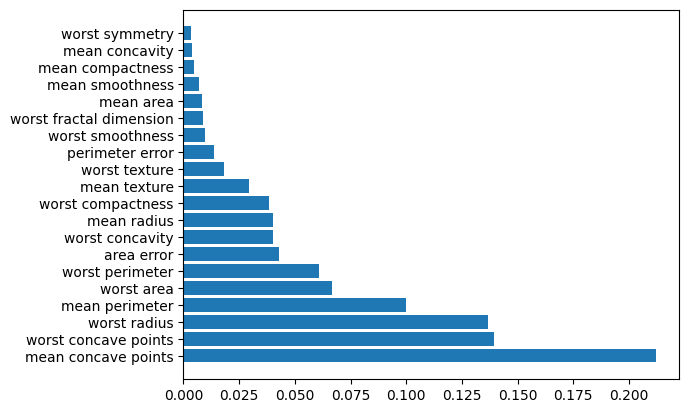

In [12]:
import matplotlib.pyplot as plt

features = rfc.feature_importances_
df = pd.DataFrame(data=features, columns=['value'])
df['name'] = cancer.feature_names

top20 = df.sort_values(by='value', ascending=False)[:20]
plt.barh(top20['name'], top20['value'])

## Boosting

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_hat = gbc.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.956140350877193


In [16]:
params = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.02, 0.05, 0.1]
}
gs = GridSearchCV(gbc, param_grid=params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 0.02, 'n_estimators': 600}
0.9604395604395604


In [17]:
y_hat = gs.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.956140350877193


In [18]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 8.5 MB/s eta 0:00:15
    --------------------------------------- 2.6/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 4.2/124.9 MB 8.4 MB/s eta 0:00:15
   -- ------------------------------------- 6.6/124.9 MB 9.6 MB/s eta 0:00:13
   -- ------------------------------------- 6.6/124.9 MB 9.6 MB/s eta 0:00:13
   -- ------------------------------------- 8.4/124.9 MB 7.2 MB/s eta 0:00:17
   --- ------------------------------------ 10.2/124.9 MB 7.8 MB/s eta 0:00:15
   ---- ----------------------------------- 13.1/124.9 MB 8.1 MB/s eta 0:00:14
   ---- ----------------------------------- 14.7/124.9 MB 8.0 MB/s eta 0:00:14
   ----- ---------------------------------- 16.8/124.9 MB 8.3 MB/s eta 0:00:14
   ------ --------------------------------- 19.1/124.9 MB 8.6 MB/s eta 0:00:13
   ------ --------------------------------- 21.2/124.9 MB 8.6 MB/

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import XGBClassifier

def evaluate(y_test, y_hat, y_prob):
    print(accuracy_score(y_test, y_hat))
    print(confusion_matrix(y_test, y_hat))
    print(precision_score(y_test, y_hat))
    print(recall_score(y_test, y_hat))
    print(f1_score(y_test, y_hat))
    print(roc_auc_score(y_test, y_prob))
    
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
y_hat = xgbc.predict(X_test)
y_prob = xgbc.predict_proba(X_test)[:,1]
evaluate(y_test, y_hat, y_prob)

0.956140350877193
[[49  5]
 [ 0 60]]
0.9230769230769231
1.0
0.9600000000000001
0.9993827160493828


In [26]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, early_stopping_rounds=100, eval_metric='logloss')
xgbc.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_hat = xgbc.predict(X_test)
y_prob = xgbc.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.64118
[1]	validation_0-logloss:0.57377
[2]	validation_0-logloss:0.51246
[3]	validation_0-logloss:0.46328
[4]	validation_0-logloss:0.42484
[5]	validation_0-logloss:0.38923
[6]	validation_0-logloss:0.36112
[7]	validation_0-logloss:0.33423
[8]	validation_0-logloss:0.31434
[9]	validation_0-logloss:0.29452
[10]	validation_0-logloss:0.27593


[11]	validation_0-logloss:0.25810
[12]	validation_0-logloss:0.24375
[13]	validation_0-logloss:0.23040
[14]	validation_0-logloss:0.22164
[15]	validation_0-logloss:0.21186
[16]	validation_0-logloss:0.20113
[17]	validation_0-logloss:0.19391
[18]	validation_0-logloss:0.18743
[19]	validation_0-logloss:0.17913
[20]	validation_0-logloss:0.17449
[21]	validation_0-logloss:0.16812
[22]	validation_0-logloss:0.16523
[23]	validation_0-logloss:0.15892
[24]	validation_0-logloss:0.15613
[25]	validation_0-logloss:0.15072
[26]	validation_0-logloss:0.14885
[27]	validation_0-logloss:0.14316
[28]	validation_0-logloss:0.13700
[29]	validation_0-logloss:0.13468
[30]	validation_0-logloss:0.13125
[31]	validation_0-logloss:0.12704
[32]	validation_0-logloss:0.12687
[33]	validation_0-logloss:0.12293
[34]	validation_0-logloss:0.12060
[35]	validation_0-logloss:0.11661
[36]	validation_0-logloss:0.11323
[37]	validation_0-logloss:0.10999
[38]	validation_0-logloss:0.11038
[39]	validation_0-logloss:0.10859
[40]	validatio

In [27]:
evaluate(y_test, y_hat, y_prob)

0.956140350877193
[[49  5]
 [ 0 60]]
0.9230769230769231
1.0
0.9600000000000001
0.9993827160493828


In [29]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, early_stopping_rounds=10, eval_metric='logloss')
xgbc.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_hat = xgbc.predict(X_test)
y_prob = xgbc.predict_proba(X_test)[:,1]
evaluate(y_test, y_hat, y_prob)

[0]	validation_0-logloss:0.64118
[1]	validation_0-logloss:0.57377
[2]	validation_0-logloss:0.51246
[3]	validation_0-logloss:0.46328
[4]	validation_0-logloss:0.42484
[5]	validation_0-logloss:0.38923
[6]	validation_0-logloss:0.36112
[7]	validation_0-logloss:0.33423
[8]	validation_0-logloss:0.31434
[9]	validation_0-logloss:0.29452


[10]	validation_0-logloss:0.27593
[11]	validation_0-logloss:0.25810
[12]	validation_0-logloss:0.24375
[13]	validation_0-logloss:0.23040
[14]	validation_0-logloss:0.22164
[15]	validation_0-logloss:0.21186
[16]	validation_0-logloss:0.20113
[17]	validation_0-logloss:0.19391
[18]	validation_0-logloss:0.18743
[19]	validation_0-logloss:0.17913
[20]	validation_0-logloss:0.17449
[21]	validation_0-logloss:0.16812
[22]	validation_0-logloss:0.16523
[23]	validation_0-logloss:0.15892
[24]	validation_0-logloss:0.15613
[25]	validation_0-logloss:0.15072
[26]	validation_0-logloss:0.14885
[27]	validation_0-logloss:0.14316
[28]	validation_0-logloss:0.13700
[29]	validation_0-logloss:0.13468
[30]	validation_0-logloss:0.13125
[31]	validation_0-logloss:0.12704
[32]	validation_0-logloss:0.12687
[33]	validation_0-logloss:0.12293
[34]	validation_0-logloss:0.12060
[35]	validation_0-logloss:0.11661
[36]	validation_0-logloss:0.11323
[37]	validation_0-logloss:0.10999
[38]	validation_0-logloss:0.11038
[39]	validatio

In [30]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 419.4 kB/s eta 0:00:03
   --------------------- ------------------ 0.8/1.4 MB 568.6 kB/s eta 0:00:02
   ----------------------------- ---------- 1.0/1.4 MB 645.1 kB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 645.1 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 671.3 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 694.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use u

In [31]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(n_estimators=400, early_stopping_round=100)
lgbmc.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')
y_hat = lgbmc.predict(X_test)
y_prob = lgbmc.predict_proba(X_test)[:,1]
evaluate(y_test, y_hat, y_prob)

[LightGBM] [Info] Number of positive: 297, number of negative: 158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.652747 -> initscore=0.631137
[LightGBM] [Info] Start training from score 0.631137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L